<a href="https://colab.research.google.com/github/elichen/adventofcode/blob/main/Day_18_Settlers_of_The_North_Pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
data = """.#.#...|#.
.....#|##|
.|..|...#.
..|#.....#
#.#|||#|#|
...#.||...
.|....|...
||...#|.#|
|.||||..|.
...#.|..|.""".split('\n')

In [20]:
data = [x.rstrip() for x in open("input.txt").readlines()]

In [21]:
def simulate_round(map_2d):
    def count_adjacent_acres(x, y, acre_type):
        count = 0
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                if 0 <= x + dx < len(map_2d) and 0 <= y + dy < len(map_2d[0]):
                    if map_2d[x + dx][y + dy] == acre_type:
                        count += 1
        return count

    new_map = []
    for i in range(len(map_2d)):
        new_row = ''
        for j in range(len(map_2d[i])):
            acre = map_2d[i][j]
            if acre == '.' and count_adjacent_acres(i, j, '|') >= 3:
                new_row += '|'
            elif acre == '|' and count_adjacent_acres(i, j, '#') >= 3:
                new_row += '#'
            elif acre == '#' and (count_adjacent_acres(i, j, '#') == 0 or count_adjacent_acres(i, j, '|') == 0):
                new_row += '.'
            else:
                new_row += acre
        new_map.append(new_row)
    return new_map

m = [row[:] for row in data]
for _ in range(10):
  m = simulate_round(m)
  # for row in m:
  #     print(row)
  # print("")

In [22]:
def count_acres(map_2d, acre_type):
    return sum(row.count(acre_type) for row in map_2d)

count_acres(m, '|') *  count_acres(m, '#')

606416

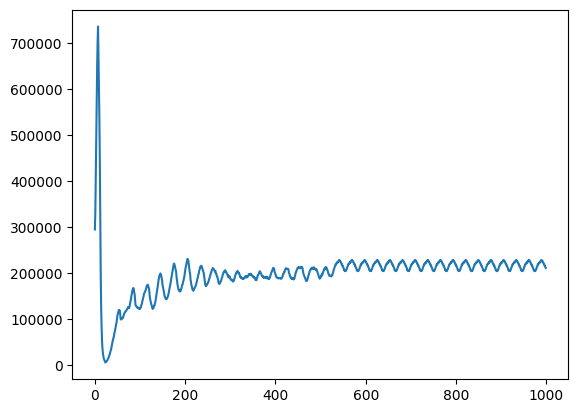

In [26]:
import matplotlib.pyplot as plt

m = [row[:] for row in data]
vs = []

for _ in range(1000):
  m = simulate_round(m)
  r = count_acres(m, '|') *  count_acres(m, '#')
  vs.append(r)

plt.plot(vs)
plt.show()

In [30]:
def find_indices(lst, value):
    return [i for i, x in enumerate(lst) if x == value]

find_indices(vs[-100:],215600)

[12, 40, 68, 96]

In [32]:
cycle = 28
offset = 800 % cycle
x = 1000000000-1
vs[800 + (x%cycle)-(offset)]

(13250, 220748)